> 

# Project: Investigating a No show Appoinment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, I set out to analyse a dataset apprising information about 100k medical appointments in Brazil, with the specific focus of showing whether or not patients show up for their appointments. The column names in the dataset being analysed are as follows: ScheduledDay, Neighbourhood, Scholarship, Age, AppointmentDay, Gender, PatientId, AppointmentId, No-show, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received.
These are the significance of some of the various columns listed.

>ScheduledDay: This column provides information on the day the patient scheduled an appointment.

>Neighborhood: This column provides information about the location of the hospital for medical checkup.

>Scholarship: This column indicates whether a patient is on welfare care program.

> Age: This column provides information on the age of the patients.

> Gender: This column provides information on whether the patient is a male or female.

> AppointmentDay:This column provides information on the actual day for medical checkup/apppointment.

> No-show: This column indicates whether or not a patient showed up for an appointment. A No answer indicates a patient showed for the appointment and a Yes answer indicates the patient didn't show up for the appointment.

> Hipertension, Diabetes, Alcoholism and Handcap indicates the disease the patient was diadnosed for.

### Question(s) for Analysis
>To analyse and effectively communicate information on this dataset, I essentially explored three questions as the basis for my analysis.

> 1. Is the accessibility to welfare program (scholarships) a major factor in assessing whether patients would show up for their medical appointments or not?
> 2. Is Age a major factor in determining whether patients would show or not?
> 3. Does gender play a significant role in determining whether patients would show up for medical appointments or not.



In [232]:
# Python libraries are initially imported.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A magicword to show plot/visualization in jupyter notebook
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> In this section of my report, dataset for my analysis is initially loaded, explored, inspected and described. I check for the tidiness of the dataset, and if neccessary clean/trim the dataset for proper analysis. Also in this section, columns that are not useful for analysis are also eliminated.

In [233]:
# Noshow_appointment dataset is loaded as df_nap and the first 5 rows are printed out and structure explored. 
df_nap = pd.read_csv('noshow_appointments.csv')
df_nap.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [234]:
# checking for missing values = There are no missing values.
df_nap.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [235]:
# checking for duplicated values- There are no duplicate values in the data set
df_nap.duplicated().sum()

0

In [245]:
#Inspection of dataset to know total sample of patients
df_nap.shape[0]

110110

In [237]:
# This shows a summary of the dataset giving information about the type of data and missing values in dataset
df_nap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information giving above, there are no missing values in any of the columns.

In [239]:
# This shows a statistical description of the data set
df_nap.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> In this subsection, I tidy the dataset to get rid of columns that are not useful in my analysis. I also make changes to types of data in the various columns.
 
>The following data assessments were made on the dataset to improve the quality of the dataset for analysis.
1. Column AppointmentID, Patient ID etc. would be dropped since it is not useful in my analysis
2. Datatype in No-show was changed from yes or No to boolean.
3. No-showed column was renamed to Showed-Up
4. Data in age column was checked for invalid data.
5. There are no missing values available in the dataset so no fill in is needed.
6. There are dublicates to be cleaned.
 

In [240]:
# Some Columns are dropped since they not useful to my current data analysis based on my questions
df_nap.drop(['AppointmentID','PatientId', 'SMS_received','ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1, inplace=True)

#Checking status of dataset
df_nap.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,F,62,0,1,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,0,1,1,0,0,No


In [241]:
#   Inspecting the nature of my updated dataset
df_nap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110527 non-null  object
 1   Age           110527 non-null  int64 
 2   Scholarship   110527 non-null  int64 
 3   Hipertension  110527 non-null  int64 
 4   Diabetes      110527 non-null  int64 
 5   Alcoholism    110527 non-null  int64 
 6   Handcap       110527 non-null  int64 
 7   No-show       110527 non-null  object
dtypes: int64(6), object(2)
memory usage: 6.7+ MB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>],
       [<AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>]], dtype=object)

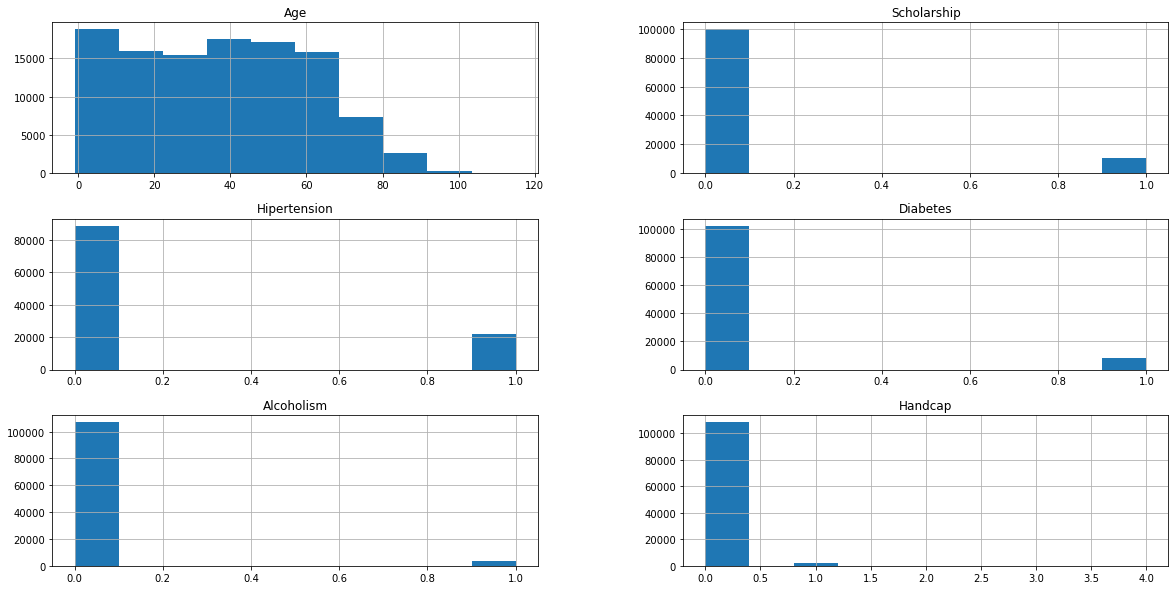

In [242]:
df_nap.hist(figsize=(20,10))

In [243]:
df_nap.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000


From the statistical description and visualization, there exist inaccuracy in the data for the age column, 
recording a minimum age of -1 and maximum age as high as 115. This data has to be revamped.

In [244]:
df_nap['Age'] = df_nap['Age'].apply(lambda x:x if x > 0 else df_nap['Age'].mean())
df_nap.drop(df_nap[df_nap['Age'] > 89].index, inplace = True)

#Checking age statistical description for confirmation
df_nap['Age'].describe()

count    110110.000000
mean         38.071144
std          21.890898
min           1.000000
25%          20.000000
50%          37.088874
75%          55.000000
max          89.000000
Name: Age, dtype: float64

In [210]:
# Renaming of No-show column to Showed-up to aviod confusion
df_nap.rename(columns={'No-show':'Showed-up'}, inplace=True)

# confirmation of changes
df_nap.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,Showed-up
0,F,62.0,0,1,0,0,0,No
1,M,56.0,0,0,0,0,0,No
2,F,62.0,0,0,0,0,0,No
3,F,8.0,0,0,0,0,0,No
4,F,56.0,0,1,1,0,0,No


In [211]:
# changing Yes or No in No-show to a boolean
df_nap['Showed-up'] = df_nap['Showed-up'].apply(lambda x: 0 if x=='Yes' else 1 )

#verifying change       
df_nap.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,Showed-up
0,F,62.0,0,1,0,0,0,1
1,M,56.0,0,0,0,0,0,1
2,F,62.0,0,0,0,0,0,1
3,F,8.0,0,0,0,0,0,1
4,F,56.0,0,1,1,0,0,1


In [212]:
#Converting datatype from object to int

df_nap['Showed-up']= df_nap['Showed-up'].astype('int')

df_nap['Showed-up'].dtype

dtype('int32')

In [213]:
#Dropping duplicates in dataset
df_nap.drop_duplicates(inplace= True)

#Confirmation check for duplicates in dataset
df_nap.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

In [214]:
#showing the first five rows of the updated dataset
df_nap.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,Showed-up
0,F,62.0,0,1,0,0,0,1
1,M,56.0,0,0,0,0,0,1
2,F,62.0,0,0,0,0,0,1
3,F,8.0,0,0,0,0,0,1
4,F,56.0,0,1,1,0,0,1


In [215]:
# Statistical description of updated dataset
df_nap.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,Showed-up
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000
mean,48.840119,0.266247,0.459549,0.300729,0.223806,0.280836,0.595159
std,21.139721,0.442068,0.498444,0.458651,0.416863,0.546702,0.490943
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,65.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Drawing Conclusions

### Research Question 1  Is the accessibility to welfare program (scholarships) a major factor in assessing whether patients would show up for their medical appointments or not?

In [216]:
Scholar_attending = df_nap.groupby('Scholarship').mean()

print(Scholar_attending)

                   Age  Hipertension  Diabetes  Alcoholism   Handcap  \
Scholarship                                                            
0            51.358538      0.476277  0.328513    0.227745  0.336195   
1            41.899571      0.413450  0.224159    0.212951  0.128269   

             Showed-up  
Scholarship             
0             0.592860  
1             0.601494  


The mean value of those with scholarship who showed up is almost equal to the mean value of those who showed for appointments without any scholarship.

Therfore, The accessibility to the welfare program cannot be a major determiner in assessing whether patients would show up for their medical appointments. This analysis is further visualized below:

In [217]:
Scholar_Showup = df_nap.groupby('Scholarship')['Showed-up'].mean()
Scholar_Showup

Scholarship
0    0.592860
1    0.601494
Name: Showed-up, dtype: float64

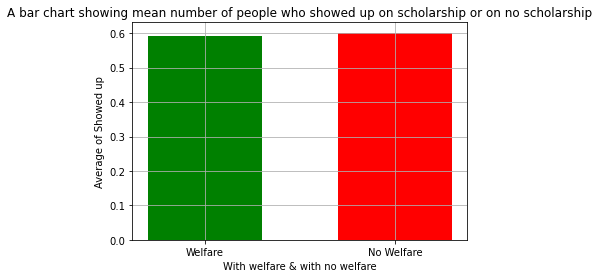

In [218]:
x = [1,2]
y = Scholar_Showup
plt.bar(x,y, width = 0.6, color = ['green','red'])
label = ['Welfare', 'No Welfare']
plt.xticks(x,label)
plt.xlabel('With welfare & with no welfare')
plt.ylabel('Average of Showed up')
plt.title('A bar chart showing mean number of people who showed up on scholarship or on no scholarship')
plt.grid()

### Research Question 2  Is Age a major factor in determining whether patients would show or not?

In [219]:
# Finding the average ages and grouping them by showed-up column
average_age= df_nap.groupby('Showed-up')['Age'].mean()

#Calling the function average_age
average_age


Showed-up
0    48.087105
1    49.352337
Name: Age, dtype: float64

It can also be seen that the averages ages of patients who showed up for appointments and those who did not are very close. This information is further visualized below.

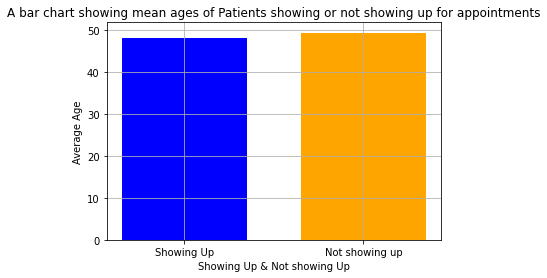

In [220]:
x=[1,2]
y= average_age
plt.bar(x,y,width=0.7, color = ['blue','orange'])
label=['Showing Up','Not showing up']
plt.xticks(x,label)
plt.xlabel('Showing Up & Not showing Up')
plt.ylabel('Average Age')
plt.title('A bar chart showing mean ages of Patients showing or not showing up for appointments')
plt.grid()

Average age for patients who showed up = 39
Average age for patients who showed up = 35

The averages ages are very close hence it can be concluded that the ages of the patients is not a major factor in determining whether a patient would show up for an appointment or not.

### Research Question 3 . Does gender play a significant role in determining whether patients would show up for medical appointments or not? 

In [221]:
#Checking to see number of females and males showing or no showing up for appointments

df_nap.groupby('Gender')['Showed-up'].value_counts()


Gender  Showed-up
F       1            957
        0            686
M       1            838
        0            535
Name: Showed-up, dtype: int64

It can be seen that more females showed up and also did not show up for their appointment than males.

In [222]:
gender_showup= df_nap.groupby('Gender')['Showed-up'].mean()
gender_showup

Gender
F    0.582471
M    0.610342
Name: Showed-up, dtype: float64

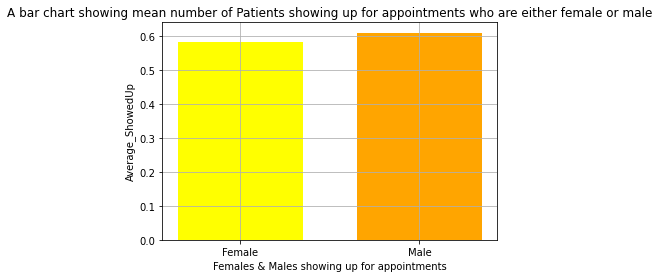

In [223]:
x=[1,2]
y= gender_showup
plt.bar(x,y,width=0.7, color = ['yellow' ,'orange'])
label=['Female','Male']
plt.xticks(x,label)
plt.xlabel('Females & Males showing up for appointments')
plt.ylabel('Average_ShowedUp')
plt.title('A bar chart showing mean number of Patients showing up for appointments who are either female or male')
plt.grid()

From the above visualization and analysis, the gender of patients does not play a significant role in determining whether patients would show up for medical appointments. The mean number of females and males who show up for appointments are almost equal.

<a id='conclusions'></a>
## Conclusions

> The following are summaries of my findings and results based on the research questions I posed initially. Recommendation for additional research is suggested to augment the data set analysis further.

>1. The availability or non-availability of scholarship opportunities does not have an effect on whether patients would show up for their appointments.
>2. The age of a patient is not a major factor in determining whether a patient would show up for an appointment or not.
>3. Also the gender of a patient cannot be a major determiner to assess whether or not a patient will show up for his or her appointment or not.
>4. A higher number of females patronized the hospital more than males.
>5. My data exploration is limited and based on a limited number of factors around Age, Gender and Scholarship availability.
   Further extensive exploration can be done to explore questions revolving around Appointmentsday, ScheduledDay and neighboorhood and how they affect or have an influence on the tendency for patients to show up for their medical apointments.
>6. Further discussions can also be done on the column of diseases to further explore how they relate columns such as gender.

## References

 > 1. https://matplotlib.org/stable/index.html
 > 2. https://pandas.pydata.org/docs/
 > 3. https://www.kaggle.com/code/mostafarefaatm/medical-appointment-no-show
 > 4. https://www.kaggle.com/datasets/joniarroba/noshowappointments/code
 